# Susceptible-Infected-Recovered Model (SIR)

### This model is used in simulating the spread of information in a network. Nodes in the network are in one of three states, susceptible (able to be infected), infected (can infect susceptible nodes), recovered (no longer infected). Infected nodes are able to infect any susceptible neighbouring nodes with a probability $p_1$, and as the number of neighbouring infected nodes increases for any susceptible node, the probability of infection increases, following $p = 1-(1-p_1)^{n_i}$, where $n_i$ is the number of neighbouring infected nodes. The infected nodes then have a probability $p_2$ that they recover, and are no longer infected. Recovered nodes however have a probability $p_3$ that they may become susceptible to the infection once more.

In this report, we will define a function to allow us to use any random graph already drawn as a SIR model to simulate the spread of information (infection). The infection will begin with one node randomly chosen, and will terminate when there are no infected nodes left, or when the time limit is reached.

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

def sir(g, si, ir, rs, time):
    print("\nInfection has begun, with a single randomly chosen node being infected.")
    print(f"Chance of susceptible node becoming infected: {si}")
    print(f"Chance of infected node recovering: {ir}")
    print(f"Chance of recovered node becoming susceptible: {rs}")
    
    # Randomly picking a node to be infected
    initial = np.random.choice(range(len(g.node())))
    infected = [initial]
    susceptible = list(range(len(g.node())))
    susceptible.remove(initial)
    recovered = []
    sgraph = [len(susceptible)]
    igraph = [1]
    rgraph = [0]
    
    # Function for drawing graph later on
    def color(n):
        if n in susceptible:
            return 'b'
        elif n in infected:
            return 'r'
        else:
            return 'g'
    
    for t in range(time):
        
        # Function to calculate the p of node becoming infected
        def si_calc(node):
            ni = [n for n in infected if n in g[node]]
            p = 1-((1-si)**len(ni))
            return p
        
        vul = [n for n in range(len(g.node())) if n in susceptible]
        if len(vul) > 0:
            si_calc = np.vectorize(si_calc)
            p_dist = si_calc(vul)
            
            factorsi = np.random.ranf(len(vul)) < p_dist
            infected_new = np.array(vul)[factorsi]
        else:
            infected_new = []
        
        # Creating lists of changes to groups of SIR states
        factorir = np.where(np.random.ranf(len(infected)) < ir)
        recovered_new = list(np.array(infected)[factorir])
        
        factorrs = np.where(np.random.ranf(len(recovered)) < rs)
        susceptible_new = list(np.array(recovered)[factorrs])
        
        # Removing the nodes that changed from the original states
        infected = list(filter(lambda n: n not in recovered_new, infected))
        recovered = list(filter(lambda n: n not in susceptible_new, recovered))
        susceptible = list(filter(lambda n: n not in infected_new, susceptible))
        
        # Adding the changed nodes into the new states
        infected.extend(infected_new)
        recovered.extend(recovered_new)
        susceptible.extend(susceptible_new)
        
        # Recording the number in each state, for plotting of graph later
        sgraph.append(len(susceptible))
        igraph.append(len(infected))
        rgraph.append(len(recovered))
        
        if len(infected) == 0:
            print(f'\nThe infection has been eradicated. Time taken: {t+1}')
            break
        
    colors = list(map(color, range(len(g.node()))))
    print(f"\nSIR model of graph after {t+1} time steps:")
    nx.draw(g, node_color = colors, node_size = 200-len(g.node())/100)
    plt.show()
    plt.clf()
    
    plt.plot(range(0, t+2), sgraph, color = 'b', label = 'Susceptible')
    plt.plot(range(0, t+2), igraph, color = 'r', label = 'Infected')
    plt.plot(range(0, t+2), rgraph, color = 'g', label = 'Recovered')
    plt.legend(loc = 'upper right')
    plt.xlabel('Time')
    plt.ylabel('Number of nodes')
    plt.show()

    return


#### With the function now defined, we can apply this to any random graph. Below, we have a simple example of an Erdos-Renyi graph of 100 nodes.

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 1515
Average degree:  30.3000

Global clustering coefficient: 0.31018821268441155
Transitivity: 0.3099584788769525


C:\Users\kjkchang\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


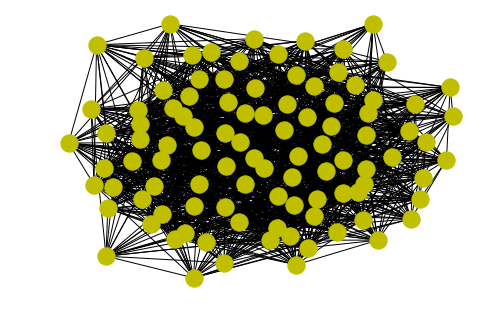

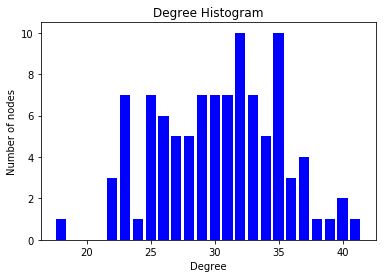

<Figure size 432x288 with 0 Axes>

In [2]:
g = nx.erdos_renyi_graph(100, 0.3)

print(nx.info(g))
print(f"\nGlobal clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
nx.draw(g, node_color = 'y')
plt.show()
plt.clf()

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values(), color='b')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()
plt.clf()



Infection has begun, with a single randomly chosen node being infected.
Chance of susceptible node becoming infected: 0.2
Chance of infected node recovering: 0.5
Chance of recovered node becoming susceptible: 0.4

SIR model of graph after 50 time steps:


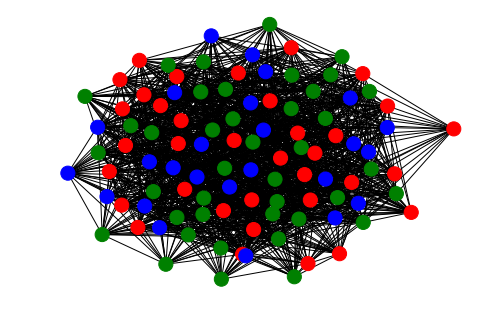

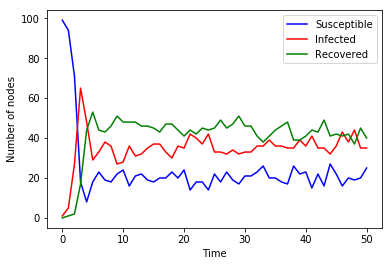

In [3]:
sir(g, 0.2, 0.5, 0.4, 50)

Suppose we want to test this out on a different graph, perhaps like one of the models that we previously defined and created in here. We will redefine the function here, and apply it to the SIR model.

## Klemm-Eguiluz Model

In [4]:
def klemm_eguiluz(n, m, mu):
    # initial condition of complete graphs with m nodes
    G = nx.complete_graph(m)
    # used to represent whether or not a node is activated(1) or deactivated(0)
    activation = list(np.ones(m))
    mu_factor = np.random.ranf(m)
    
    for i in range(m, n):
        # generate list of edges which are to be randomly rewired
        mu_factor = np.random.ranf(m) < mu
        activated = np.where(np.array(activation) == 1)[0]

        targets = set([activated[j] for j in range(m) if mu_factor[j] == 0])
        
        # Linear preferential attachment
        p_total = np.array(list(map(G.degree, range(i))))
        p_dstr = p_total / sum(p_total)
        
        while len(targets) < m:
            targets.add(np.random.choice(list(range(i)), p = p_dstr))
        G.add_edges_from(zip(np.full(m, i), list(targets)))
        
        # Activation and deactivation where p = a / k, and 1/a = sum of 1/k
        
        k =  np.array([G.degree(active)**-1 for active in activated])
        a = sum(k)
        p_deact = k / a
        deactivated = np.random.choice(activated, p = p_deact)
        activation[deactivated] = 0
        activation.append(1)
                
    return G     

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 945
Average degree:  18.9000

Global clustering coefficient: 0.5963483142538761
Transitivity: 0.4282299827380162


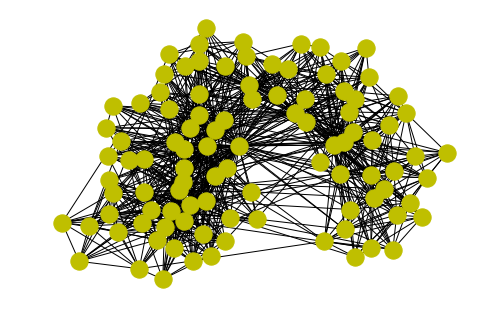

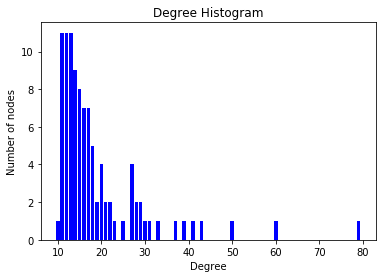

<Figure size 432x288 with 0 Axes>

In [5]:
g = klemm_eguiluz(100, 10, 0.1)

print(nx.info(g))
print(f"\nGlobal clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
nx.draw(g, node_color = 'y')
plt.show()
plt.clf()

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values(), color='b')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()
plt.clf()



Infection has begun, with a single randomly chosen node being infected.
Chance of susceptible node becoming infected: 0.2
Chance of infected node recovering: 0.5
Chance of recovered node becoming susceptible: 0.4

SIR model of graph after 50 time steps:


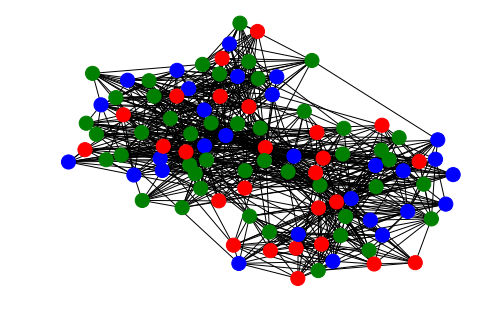

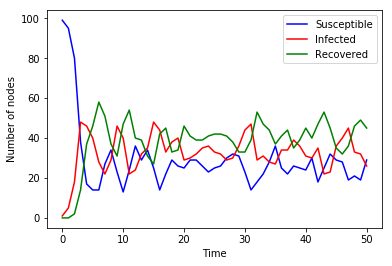

In [6]:
sir(g, 0.2, 0.5, 0.4, 50)

## Chang-Chang Model

In [7]:
# Function to generate random polar coordinates
def post_gen():
    theta, norm = np.random.ranf() * np.pi * 2, np.random.ranf()
    x, y = np.cos(theta) * norm, np.sin(theta) * norm
    return [x, y]

def chang_chang(n, k, phi, chi, delta):
    
    g = nx.Graph()
    
    # coordinates for cluster bases
    clusters = [[int(i)] for i in range(chi)]
    cluster_b = [tuple(post_gen()) for i in clusters]
    posts = cluster_b.copy()
    
    # function to return formatted tuple to add position with node
    def cluster_b_gen(node):
        return (node, dict(pos = cluster_b[node]))
    
    initial = list(map(cluster_b_gen, range(chi)))
    g.add_nodes_from(initial)
    

    # function to add chi edges among first chi nodes; ensure graph is connected. Not implemented currently
    def edge_initialize(node):
        target = np.random.choice(range(chi))
        return (node, target)
    
    edges_initialize = list(map(edge_initialize, range(chi)))
    g.add_edges_from(edges_initialize)

    
    for node in range(chi, n):
        # Adding node into one of the clusters. Not implementing preferential addition now.
        '''
        pplns = list(map(len, clusters))
        ppln = list(np.array(pplns) / sum(pplns))
        '''
        cluster_add = np.random.choice(range(chi))
        i = cluster_add
        clusters[i].append(node)
        
        # Scaling random coordinates generated with post_gen by delta, returning new coordinates for point
        def delt_gen(node):
            delt = post_gen()
            delt = tuple([delt[0] / delta, delt[1] / delta])
            post = (cluster_b[i][0] + delt[0], cluster_b[i][1] + delt[1])
            posts.append(post)
            return post
        
        g.add_node(node, pos = delt_gen(node))

        def edges(k):
            
            # Calculating distance between points
            def distance(target):
                dist = ((posts[node][0] - posts[target][0]) ** 2 + (posts[node][1] - posts[target][1]) ** 2)**0.5
                return dist
            
            # Probability distribution where p = (k+1)^phi / d, k+1 is used so nodes with zero degree can be chosen
            def pcalc(target):
                d = distance(target)
                return ((g.degree(target)+1)**phi) / d
            
            def p_dist(targets):
                dist = np.array(list(map(pcalc, targets)))
                dist = dist / sum(dist)
                return list(dist)
            
            # determining edges and targets of edges
            size_n = np.random.randint(1, k)
            targets = np.random.choice(range(0, node), p = p_dist(range(0, node)), size = size_n, replace = False)
            edges_add = list(zip(targets, np.full(len(targets), node)))
        
            return edges_add
    
        g.add_edges_from(edges(k))
    
    print(f"\nNo. of clusters: {len(clusters)}")
    return g


No. of clusters: 20
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 584
Average degree:  11.6800

Global clustering coefficient: 0.23545398443895707
Transitivity: 0.21668496158068057


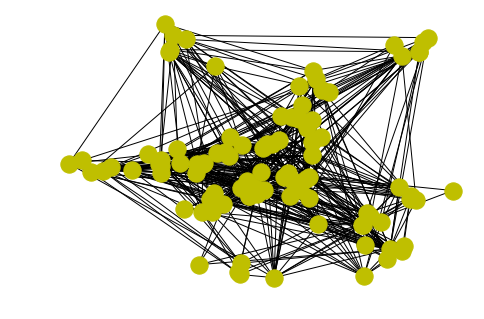

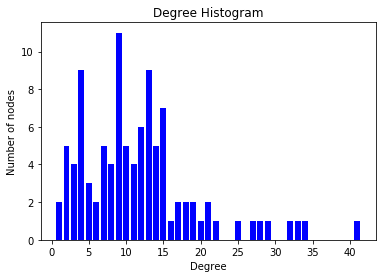

<Figure size 432x288 with 0 Axes>

In [8]:
g = chang_chang(100, 15, 1, 20, 5)

print(nx.info(g))
print(f"\nGlobal clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
pos = nx.get_node_attributes(g, 'pos')
nx.draw(g, pos, node_color = 'y')
plt.show()
plt.clf()

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values(), color='b')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()
plt.clf()



Infection has begun, with a single randomly chosen node being infected.
Chance of susceptible node becoming infected: 0.2
Chance of infected node recovering: 0.5
Chance of recovered node becoming susceptible: 0.4

SIR model of graph after 50 time steps:


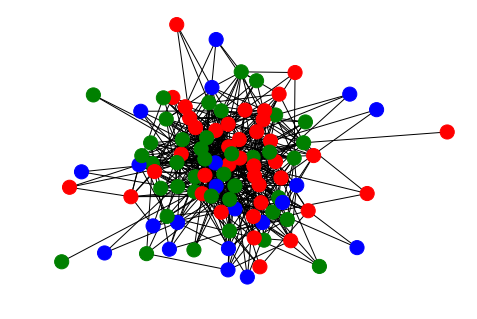

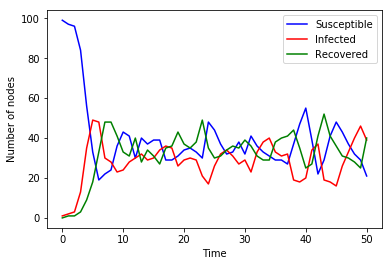

In [9]:
sir(g, 0.2, 0.5, 0.4, 50)

## Stochastic Block Model

In [10]:
def block(n, p1, p2, zeta = 0.5):
    groups = []

    while sum(groups) < n:
        ppln = np.random.randint(1, n * zeta)
        if ppln + sum(groups) > n:
            ppln = n - sum(groups)
        groups.append(ppln)
        
    edges = np.random.ranf([n, n])
    edges = (edges + edges.T) / 2
    targets = edges.copy()
    targets = targets < (p2*2)
    group = 0
    node = 0
    while group < len(groups):
        append = edges[node:node+groups[group], node:node+groups[group]] < p1 * 2
        targets[node:node+groups[group], node:node+groups[group]] = append
        node = node + groups[group]
        group +=1
    
    print(f"Number of clusters: {len(groups)}")
    g = nx.from_numpy_matrix(targets)
    return g

Number of clusters: 10
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 754
Average degree:  15.0800

Global clustering coefficient: 0.7228808836502334
Transitivity: 0.763532444245209


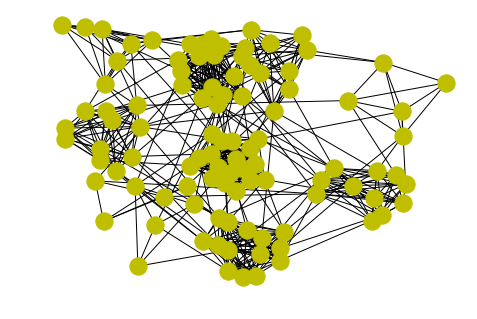

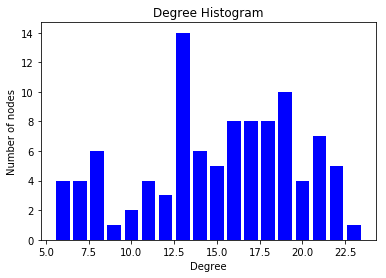

<Figure size 432x288 with 0 Axes>

In [11]:
g = block(100, 0.7, 0.05, zeta = 0.2)

print(nx.info(g))
print(f"\nGlobal clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
nx.draw(g, node_color = 'y')
plt.show()
plt.clf()

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values(), color='b')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()
plt.clf()



Infection has begun, with a single randomly chosen node being infected.
Chance of susceptible node becoming infected: 0.2
Chance of infected node recovering: 0.5
Chance of recovered node becoming susceptible: 0.4

SIR model of graph after 50 time steps:


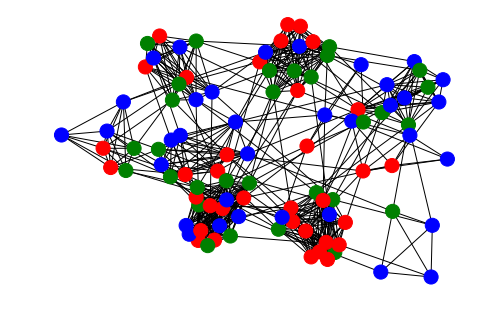

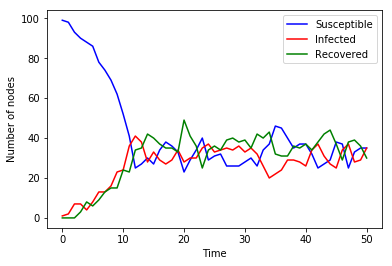

In [12]:
sir(g, 0.2, 0.5, 0.4, 50)

## Random Geometric Graph

In [13]:
# Function to generate random polar coordinates
def post_gen(t):
    theta, norm = np.random.ranf() * np.pi * 2, np.random.ranf()
    x, y = np.cos(theta) * norm, np.sin(theta) * norm
    return [x, y]

def geometric_graph(n, d):
    g = nx.Graph()
    posts = list(map(post_gen, range(n)))
    
    def node_add(node):
        return (node, dict(pos = posts[node]))
    
    nodes = list(map(node_add, range(n)))
    g.add_nodes_from(nodes)
    
    def edges_add(node):
    
        def distance(target):
            dist = ((posts[node][0] - posts[target][0]) ** 2 + (posts[node][1] - posts[target][1]) ** 2)**0.5
            return dist
        
        distance = np.vectorize(distance)
        dists = distance(range(n))
        targets = np.where(dists < d)[0]
        return zip(targets, np.full(len(targets), node))
    
    edges_add = np.vectorize(edges_add)
    edges = edges_add(range(n))
    for edge in edges:
        g.add_edges_from(edge)
        
    return g


Name: 
Type: Graph
Number of nodes: 100
Number of edges: 1106
Average degree:  22.1200

Global clustering coefficient: 0.6541417577728815
Transitivity: 0.6685634653350366


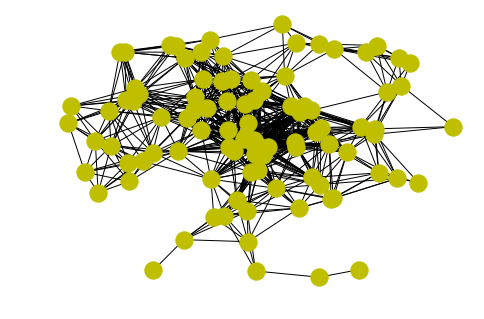

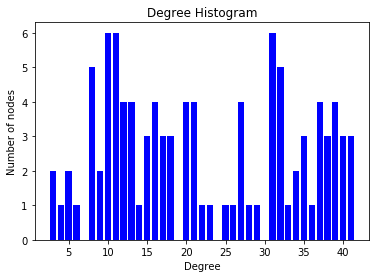


Infection has begun, with a single randomly chosen node being infected.
Chance of susceptible node becoming infected: 0.4
Chance of infected node recovering: 0.5
Chance of recovered node becoming susceptible: 0.4

SIR model of graph after 50 time steps:


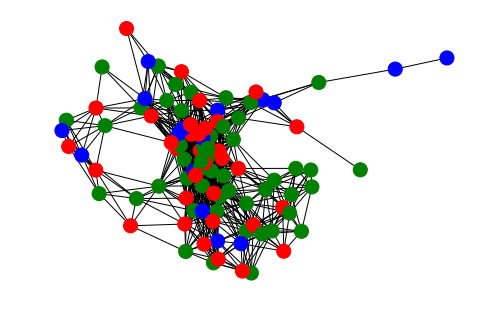

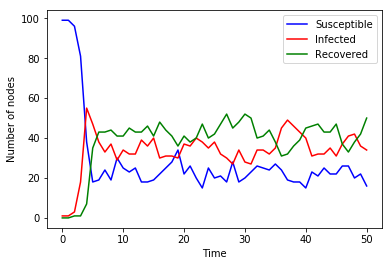

In [14]:
g = geometric_graph(100, 0.4)

print(nx.info(g))
print(f"\nGlobal clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
pos = nx.get_node_attributes(g, 'pos')
nx.draw(g, pos, node_color = 'y')
plt.show()
plt.clf()

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values(), color='b')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()
plt.clf()

sir(g, 0.4, 0.5, 0.4, 50)

## Facebook

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910

Global clustering coefficient: 0.6055467186200876
Transitivity: 0.5191742775433075


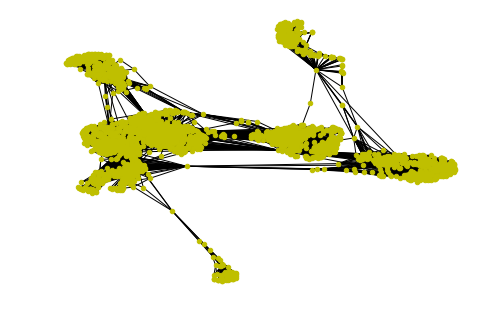

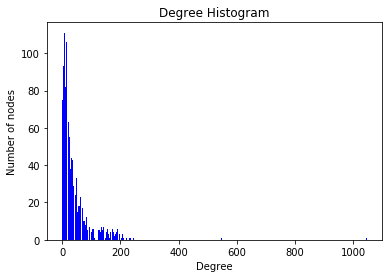

<Figure size 432x288 with 0 Axes>

In [5]:
g = nx.Graph()
with open("facebook_combined.txt") as f:
    edges = f.read().split("\n")
    edges.pop()
    edges = [tuple(map(int, edge.split(" "))) for edge in edges]
g.add_edges_from(edges)

print(nx.info(g))
print(f"\nGlobal clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
nx.draw(g, node_color = 'y', node_size = 20)
plt.show()
plt.clf()

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values(), color='b')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()
plt.clf()



Infection has begun, with a single randomly chosen node being infected.
Chance of susceptible node becoming infected: 0.2
Chance of infected node recovering: 0.5
Chance of recovered node becoming susceptible: 0.4

SIR model of graph after 50 time steps:


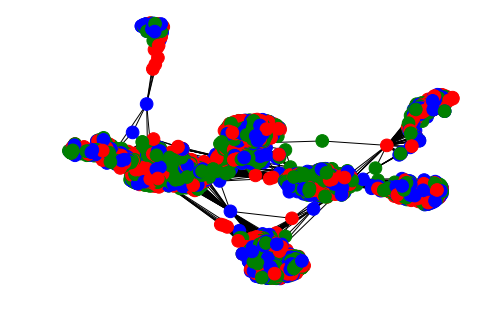

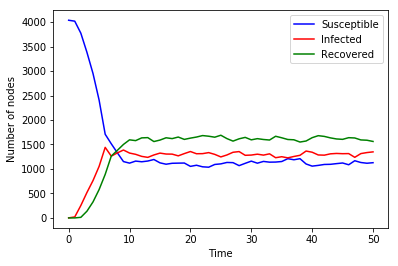

In [12]:
sir(g, 0.2, 0.5, 0.4, 50)